@author Joubert Alexandrino de Souza
@version 2020-11-25

-----------------------------------------------
# Resolvendo um problema de classificação
-----------------------------------------------


## 1 - Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

<b>Indian Liver Patient Records</b>

<b>Data available at:</b> https://www.kaggle.com/uciml/indian-liver-patient-records

<b>Context</b>

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.
Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

<b>Columns:</b>

    Age of the patient
    Gender of the patient
    Total Bilirubin
    Direct Bilirubin
    Alkaline Phosphotase
    Alamine Aminotransferase
    Aspartate Aminotransferase
    Total Protiens
    Albumin
    Albumin and Globulin Ratio
    Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

<b>Objective</b>

Use these patient records to determine which patients have liver disease and which ones do not. 


In [1]:
# Importa as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Ajustes
%matplotlib inline

In [2]:
#Carrega os dados
dados = pd.read_csv('https://raw.githubusercontent.com/joubert-alexandrino/reconhecimento-padroes/main/indian_liver_patient.csv', sep=',')
dados.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
#Exibe as estatísticas do dados
dados.describe().round(2)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.00,583.00,583.00,583.00,583.00,583.00,583.00,583.00,579.00,583.00
mean,44.75,3.30,1.49,290.58,80.71,109.91,6.48,3.14,0.95,1.29
std,16.19,6.21,2.81,242.94,182.62,288.92,1.09,0.80,0.32,0.45
min,4.00,0.40,0.10,63.00,10.00,10.00,2.70,0.90,0.30,1.00
25%,33.00,0.80,0.20,175.50,23.00,25.00,5.80,2.60,0.70,1.00
50%,45.00,1.00,0.30,208.00,35.00,42.00,6.60,3.10,0.93,1.00
75%,58.00,2.60,1.30,298.00,60.50,87.00,7.20,3.80,1.10,2.00
max,90.00,75.00,19.70,2110.00,2000.00,4929.00,9.60,5.50,2.80,2.00


In [4]:
# Exibe a matriz de correlação dos dados
dados.corr().round(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000,0.012,0.008,0.080,-0.087,-0.020,-0.187,-0.266,-0.216,-0.137
Total_Bilirubin,0.012,1.000,0.875,0.207,0.214,0.238,-0.008,-0.222,-0.206,-0.220
Direct_Bilirubin,0.008,0.875,1.000,0.235,0.234,0.258,-0.000,-0.229,-0.200,-0.246
Alkaline_Phosphotase,0.080,0.207,0.235,1.000,0.126,0.167,-0.029,-0.165,-0.234,-0.185
Alamine_Aminotransferase,-0.087,0.214,0.234,0.126,1.000,0.792,-0.043,-0.030,-0.002,-0.163
Aspartate_Aminotransferase,-0.020,0.238,0.258,0.167,0.792,1.000,-0.026,-0.085,-0.070,-0.152
Total_Protiens,-0.187,-0.008,-0.000,-0.029,-0.043,-0.026,1.000,0.784,0.235,0.035
Albumin,-0.266,-0.222,-0.229,-0.165,-0.030,-0.085,0.784,1.000,0.690,0.161
Albumin_and_Globulin_Ratio,-0.216,-0.206,-0.200,-0.234,-0.002,-0.070,0.235,0.690,1.000,0.163
Dataset,-0.137,-0.220,-0.246,-0.185,-0.163,-0.152,0.035,0.161,0.163,1.000


## 2 - Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

In [5]:
#Separa as características do target
X, y = dados.drop('Dataset', axis=1), dados['Dataset']
X.shape, y.shape, set(y)
#y

((583, 10), (583,), {1, 2})

In [6]:
#Converte o campo Gender para inteiro
# Male = 1 e Female = 2
X['Gender'] = X['Gender'].map({'Male':int(1), 'Female':int(2)})

# Preenche os campos vazios com valores médios
X.fillna(X.mean(axis=0), inplace=True)

X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


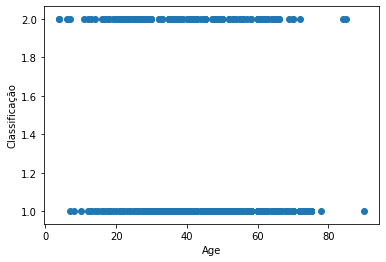

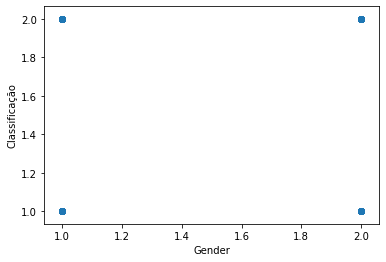

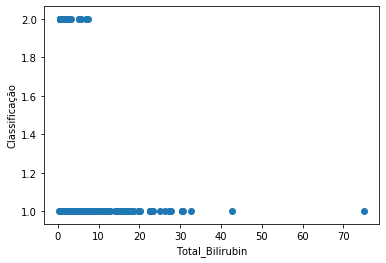

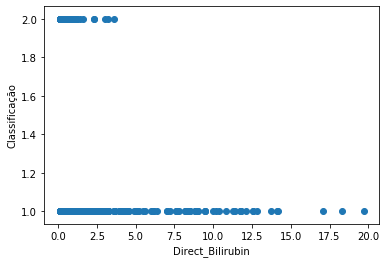

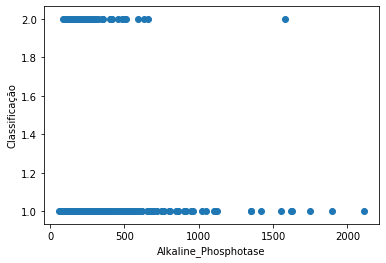

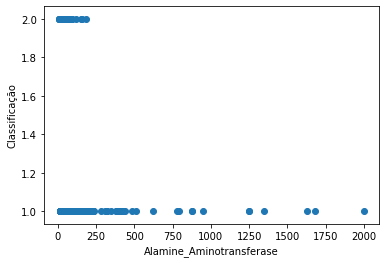

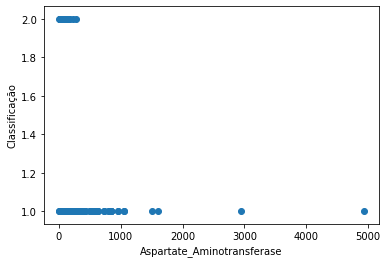

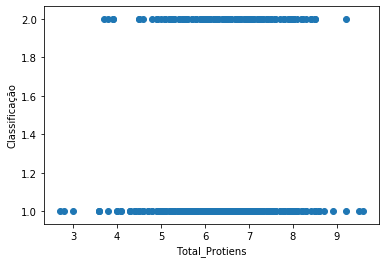

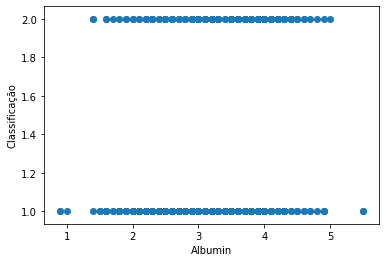

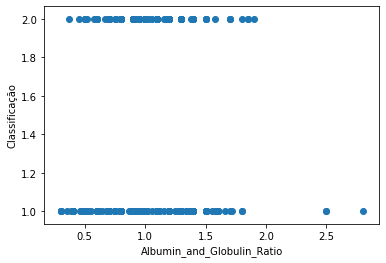

In [7]:
for i in range(X.shape[1]):
    plt.xlabel(X.columns[i])
    plt.ylabel("Classificação")
    plt.scatter(X[X.columns[i]], y)
    plt.show()

In [8]:
# Cria o modelo e o treina
modelo = LogisticRegression()
modelo.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 3 - Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado

In [9]:
#Realiza os cáculos
ypred = modelo.predict(X)
mse = mean_squared_error(y, ypred).round(4)
print("\nValor do MSE = ", mse)


Valor do MSE =  0.2882


## 4 - Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.
### 4.1 - Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.
### 4.2 - O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.

Dados
Intercept: 0.2172822804623913
Start: -0.0827177195376087
Stop: 0.5172822804623913
J: 0


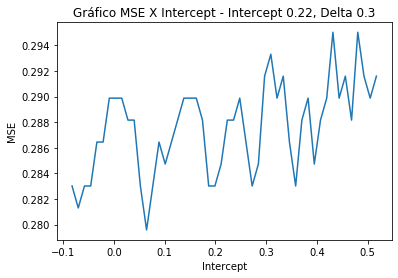

Dados
Intercept: 0.2172822804623913
Start: -0.7827177195376087
Stop: 1.2172822804623913
J: 1


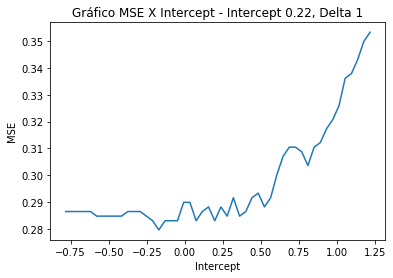

Dados
Intercept: 0.2172822804623913
Start: -9.782717719537608
Stop: 10.217282280462392
J: 2


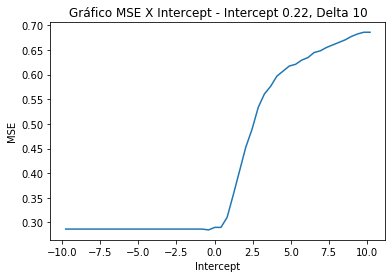

In [10]:
#Configuração dos Deltas
delta = [0.3,1,10]
#Tamanho das amostras para criação dos gráficos
num = 50

#Percorre todos os Intercepts
for i in range(len(modelo.intercept_)):    

    #Imprime os gráficos de erros com os deltas propostos e as variações dos mesmos
    for j in range(len(delta)):

        intercept = modelo.intercept_[i]       

        start = intercept - delta[j]
        stop  = intercept + delta[j]

        print("Dados\nIntercept: {0}\nStart: {1}\nStop: {2}\nJ: {3}".format(intercept, start, stop, j ))

        pontosX = np.linspace(start , stop, num).reshape(-1,1)
        pontosY = np.empty(pontosX.shape[0])

        #Calcula os dados para exibir o gráfico
        for l in range(pontosY.shape[0]):
            
            modelo.intercept_[i] = pontosX[l]
            ypred = modelo.predict(X)
            pontosY[l] = mean_squared_error(y, ypred)

        #Devolve o valor do Intercept
        modelo.intercept_[i] = intercept                
        
        #Plota o Gráfico
        plt.title("Gráfico MSE X Intercept - Intercept {0}, Delta {1}".format(intercept.round(2), delta[j]))        
        plt.xlabel("Intercept")
        plt.ylabel("MSE")
        plt.plot(pontosX, pontosY)
        plt.show()